In [1]:
from keras.datasets import mnist 
import numpy as np 
(x_train, _), (x_test, _) = mnist.load_data() 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 


In [2]:
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.) 


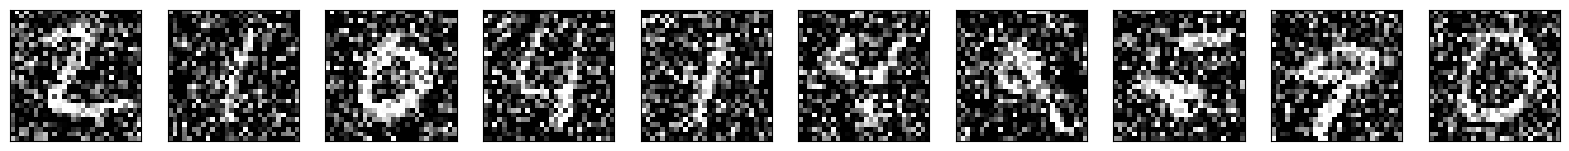

In [3]:
import matplotlib.pyplot as plt 
n = 10 
plt.figure(figsize=(20, 2)) 
for i in range(1, n + 1): 
    ax = plt.subplot(1, n, i) 
    plt.imshow(x_test_noisy[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 
plt.show()


In [5]:
from keras import layers
import tensorflow as tf
from keras.callbacks import TensorBoard 
import keras
encoding_dim = 32 # This is our input image 
input_img = keras.Input(shape=(784,)) 

encoded = layers.Dense(encoding_dim, activation='relu')(input_img) 
decoded = layers.Dense(784, activation='sigmoid')(encoded) 
autoencoder = keras.Model(input_img, decoded) 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 
autoencoder.fit(x_train_noisy, x_train,epochs=100, batch_size=128, shuffle=True,validation_data=(x_test_noisy, x_test))
encoder = keras.Model(input_img, encoded) 

# This is our encoded (32-dimensional) input 
encoded_input = keras.Input(shape=(encoding_dim,)) 
# Retrieve the last layer of the autoencoder model 
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs) 

2024-03-22 14:49:12.218885: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-22 14:49:12.219218: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-22 14:49:12.219232: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-22 14:49:12.219974: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-22 14:49:12.220618: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2024-03-22 14:49:13.934024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 4s 5ms/step - loss: 0.2551 - val_loss: 0.1949
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1782 - val_loss: 0.1644
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1595 - val_loss: 0.1524
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1507 - val_loss: 0.1470
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1475 - val_loss: 0.1452
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1464 - val_loss: 0.1446
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1458 - val_loss: 0.1441
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1455 - val_loss: 0.1438
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1452 - val_loss: 0.1436
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1451 - val_loss: 0.1436
E

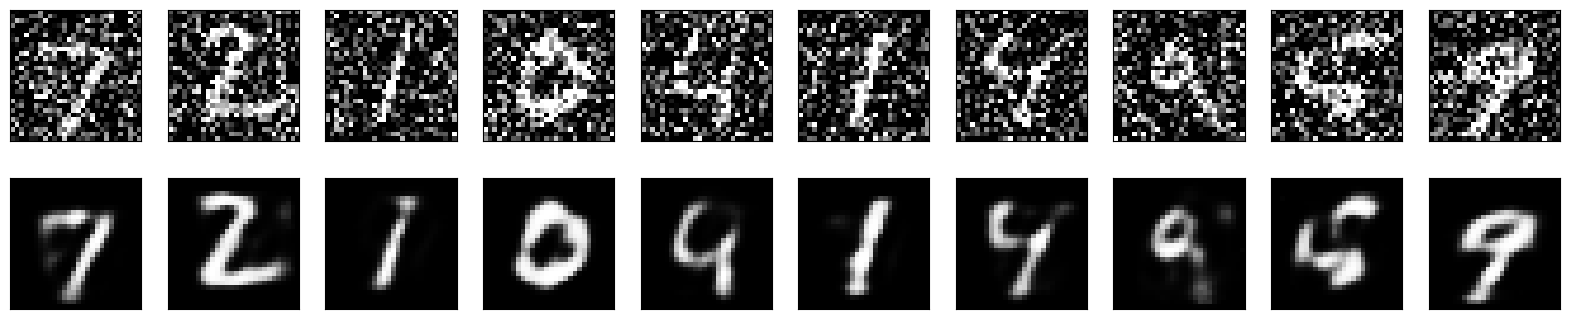

In [12]:
import matplotlib.pyplot as plt 
n = 10 # How many digits we will display 
plt.figure(figsize=(20, 4))
for i in range(n): 
# Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test_noisy[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 
# Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(decoded_imgs[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 
plt.show() 